<a href="https://colab.research.google.com/github/Kaiwen-d/ML-project/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [2]:
from os import chdir, listdir

print(listdir('./'))

chdir('/content/drive/MyDrive')

print(listdir('./'))

['.config', 'drive', 'sample_data']
['1-1-Intro.mp4', 'obj_dict_1126.dat', 'obj_dict.dat', '1_Latif_UnseenSweetness.pdf', '3_Fan_LessonsAboutChinaandRace.pdf', '2_Ye_La double vie de Veronica.pdf', '4_Sedaris_JesusShaves.pdf', 'Getting started.pdf', 'HealthHistory_在线健康问卷填写说明.pdf', 'book (3).gdoc', 'book (2).gdoc', 'book (1).gdoc', 'fantastic questions', 'Sample - Superstore.gsheet', 'SQL.gdoc', 'trend project', 'Copy of AnswerSheetSQL (1).gdoc', 'Copy of AnswerSheetSQL zhienli.gdoc', 'Copy of AnswerSheetSQL.gdoc', 'functionality.mp4', 'notes simplified.gdoc', 'Untitled presentation.gslides', 'book.gdoc', 'MO', 'Copy of Four Year Plan Visual.gdoc', 'Airline Reservations with Overbooking.xlsx', 'Untitled Diagram (1).drawio', 'Untitled Diagram.pdf', 'Untitled Diagram.gdoc', 'HW2.drawio', 'Database HW1.drawio', 'Project Part1.drawio', 'Homework 3.gdoc', 'project part2.drawio', 'database HW4.gdoc', 'Screen Shot 2020-03-31 at 06.50.51 (1).png', 'Screen Shot 2020-03-31 at 06.50.38 (1).png', '

In [3]:
import pickle
import matplotlib.pyplot as plt

data_dict = pickle.load(open('/content/drive/MyDrive/obj_dict.dat', 'rb'))

dataset = data_dict['added_filter_20_dataset_chw']

print(dataset.keys())
print(type(dataset['data']), dataset['data'][0].keys())
print(type(dataset['label_idx']), dataset['label_idx'])

dict_keys(['data', 'label_idx'])
<class 'list'> dict_keys(['face', 'label'])
<class 'dict'> {'with_mask': [1, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 26, 27, 28, 29, 30, 31, 34, 36, 37, 38, 39, 40, 41, 42, 43, 45, 47, 48, 49, 50, 51, 52, 53, 55, 56, 57, 58, 59, 60, 61, 63, 64, 66, 67, 68, 69, 70, 71, 74, 76, 77, 78, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 95, 96, 97, 98, 99, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 121, 123, 124, 125, 126, 128, 129, 133, 134, 136, 137, 138, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 173, 175, 179, 180, 182, 183, 184, 185, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 215, 216, 217, 218, 219, 220, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 23

In [6]:

dataset = dataset['data']


TypeError: ignored

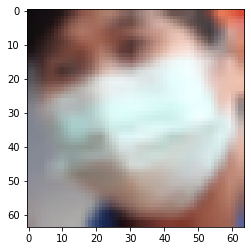

In [8]:
plt.imshow(np.transpose(dataset[20]['face'],(1,2,0)));

In [7]:
import torch
import torch.autograd as autograd
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim 
import numpy as np
from torch.utils.data import Dataset
import torchvision.models as models
from torchvision import transforms as T


class MyDataset(Dataset):
    def __init__(self, dataset,transform):
        self.dataset = dataset
        self.transform = transform
        self.label_dict = {'without_mask':0,'with_mask':1,'mask_weared_incorrect':2}
    
    def __getitem__(self, index):
        img = self.dataset[index]['face']
        label = self.label_dict[self.dataset[index]['label']]
        img = torch.as_tensor(img, dtype=torch.float32)
        img = img/255
        label = torch.tensor(label)
        if self.transform:
          img = self.transform(img)

        return img, label
    
    def __len__(self):
        return len(self.dataset)

In [9]:
face_dataset = MyDataset(dataset,transform = None)
dataset_size = len(dataset)
train_size = int(dataset_size * 0.6)
val_size = int(dataset_size * 0.2)
test_size = dataset_size - train_size - val_size

train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(face_dataset, [train_size, val_size, test_size])

In [10]:
BATCH_SIZE = 16

train_loader = torch.utils.data.DataLoader(train_dataset,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)

val_loader = torch.utils.data.DataLoader(val_dataset,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)

In [11]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 20, 5, 1)    # input 3 channel, because rgb image. 20 filters, 5x5 size
        self.conv2 = nn.Conv2d(20, 50, 5, 1)   # input 20 channel, previous layer has 20 filters. 50 filters, 5x5 size
        self.fc1 = nn.Linear(13*13*50, 500)      # 13*13*50 --> 500 linear layer
        self.fc2 = nn.Linear(500, 3)          # 500 --> 3 linear layer

    def forward(self, x):  
        x = F.relu(self.conv1(x)) 
        x = F.max_pool2d(x, 2, 2) 
        x = F.relu(self.conv2(x)) 
        x = F.max_pool2d(x, 2, 2) 
        x = x.view(-1, 13*13*50)   
        x = F.relu(self.fc1(x))   
        x = self.fc2(x)           
        return F.log_softmax(x, dim=1)  

In [12]:

device

NameError: ignored

In [13]:



def train(model, device, train_loader, optimizer, epoch, log_interval=100):
    train_loss = 0
    model.train() 
    for batch_idx, (img, label) in enumerate(train_loader):   
        
        img, label = img.to(device), label.to(device)     # use gpu if possible
        optimizer.zero_grad()                                 # clean gradients
        output = model(img)
        loss = criterion(output, label)                      # what is loss
        train_loss += loss.item()

        loss.backward()                                       # calculate loss
        optimizer.step()                                      # update weights (update filters in this case)
        if batch_idx % log_interval == 0:
            print("Train Epoch: {} [{}/{} ({:0f}%)]\tLoss: {:.6f}".format(
                epoch, 
                batch_idx * len(img), 
                len(train_loader.dataset), 
                100. * batch_idx / len(train_loader), 
                loss.item()
            ))
    train_loss /=len(train_loader.dataset)
    return train_loss


In [14]:

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for img, label in test_loader:
            img, label = img.to(device), label.to(device)
            output = model(img) 
            test_loss += F.cross_entropy(output, label, reduction='sum').item()
                       
            pred = output.argmax(dim=1, keepdim=True) # get the index of the max log-probability
            

            correct += pred.eq(label.view_as(pred)).sum().item()


    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    return test_loss

In [37]:
use_cuda = torch.cuda.is_available()  
device = torch.device("cuda" if use_cuda else "cpu")  

lr = 0.01




model = models.resnet50(pretrained=True)
num_ftrs = model.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model.fc = nn.Linear(num_ftrs, 3)

# model = Net()
# # move model to the right device
model.to(device)
optimizer = optim.SGD(model.parameters(), lr=lr) 
criterion = nn.CrossEntropyLoss()

In [38]:
epochs =20
train_losses = []
test_losses = []
for epoch in range(1, epochs + 1):
    train_loss = train(model, device, train_loader, optimizer, epoch)
    train_losses.append(train_loss)

    test_loss=test(model, device, val_loader)
    test_losses.append(test_loss)

Train Epoch: 1 [0/1366 (0.000000%)]	Loss: 1.052809

Test set: Average loss: 0.2595, Accuracy: 417/455 (92%)

Train Epoch: 2 [0/1366 (0.000000%)]	Loss: 0.131972

Test set: Average loss: 0.2107, Accuracy: 430/455 (95%)

Train Epoch: 3 [0/1366 (0.000000%)]	Loss: 0.117777

Test set: Average loss: 0.1838, Accuracy: 429/455 (94%)

Train Epoch: 4 [0/1366 (0.000000%)]	Loss: 0.010292

Test set: Average loss: 0.1987, Accuracy: 429/455 (94%)

Train Epoch: 5 [0/1366 (0.000000%)]	Loss: 0.016489

Test set: Average loss: 0.2502, Accuracy: 423/455 (93%)

Train Epoch: 6 [0/1366 (0.000000%)]	Loss: 0.014674

Test set: Average loss: 0.3472, Accuracy: 411/455 (90%)

Train Epoch: 7 [0/1366 (0.000000%)]	Loss: 0.035971

Test set: Average loss: 0.3219, Accuracy: 420/455 (92%)

Train Epoch: 8 [0/1366 (0.000000%)]	Loss: 0.038217

Test set: Average loss: 0.2223, Accuracy: 426/455 (94%)

Train Epoch: 9 [0/1366 (0.000000%)]	Loss: 0.001483

Test set: Average loss: 0.1888, Accuracy: 429/455 (94%)

Train Epoch: 10 [0/

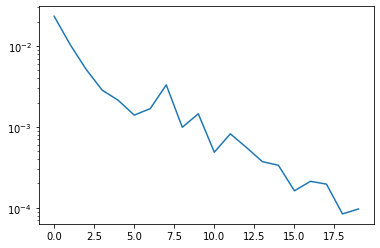

In [39]:

plt.semilogy(train_losses);


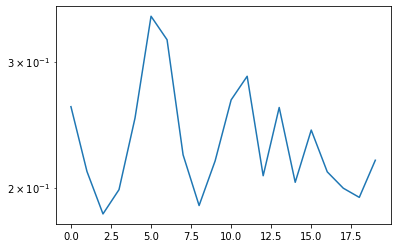

In [40]:

plt.semilogy(test_losses);

In [95]:
count_0 = 0
count_1 = 0
count_2 = 0
for i,j in test_dataset:
  if j ==torch.tensor(0):
    count_0 += 1
  elif j == torch.tensor(1):
    count_1+=1
  elif j==torch.tensor(2):
    count_2 +=1
print([count_0,count_1,count_2])

[65, 365, 26]


In [41]:
test(model,device,test_loader)


Test set: Average loss: 0.1293, Accuracy: 440/456 (96%)



0.12929024007334783

tensor([[-4.3612,  3.0907,  2.7092]], device='cuda:0', grad_fn=<AddmmBackward>)
tensor([[1]], device='cuda:0')


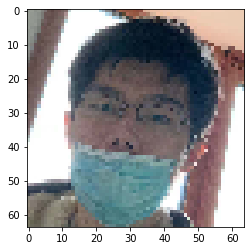

In [44]:
from PIL import Image
import cv2
img = cv2.imread('/content/drive/MyDrive/kd_test/2.png')

img = cv2.resize(img,(64,64))

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)


img = img.transpose((2, 0, 1))
img = torch.as_tensor(img, dtype=torch.float32)/255
img = img.view(1, 3, 64,64)
output = model(img.to(device))
pred = output.argmax(dim=1, keepdim=True)
print(output)
print(pred)

In [45]:
def get_all_preds(model, loader,device):
    all_preds = torch.tensor([])
    targets =torch.tensor([])
    with torch.no_grad():
        for batch in loader:
            img, label = batch
            img, label = img.to(device), label.to(device)
            preds = torch.Tensor.cpu(model(img))
            all_preds = torch.cat(
                (all_preds, preds)
                ,dim=0
            )
            targets = torch.cat((targets,torch.Tensor.cpu(label)),dim = 0)
    return all_preds, targets.int()

In [46]:
from sklearn.metrics import confusion_matrix
import itertools

In [47]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 52   1   0]
 [  1 359   7]
 [  3   4  29]]


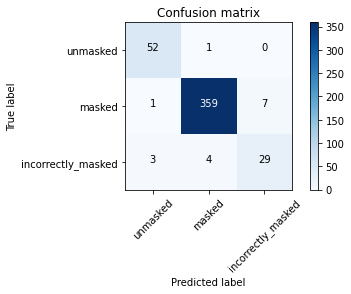

In [48]:
preds,targets = get_all_preds(model, test_loader,device)
cm = confusion_matrix(targets,preds.argmax(dim = 1))
plot_confusion_matrix(cm,['unmasked','masked','incorrectly_masked'])

In [50]:
from google.colab import files
torch.save(model, 'model.pth')

# download checkpoint file
files.download('model.pth')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>